# Handwritten Recognition

## Initialization

### Imports

In [25]:
import os
import numpy as np

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from build_db import build_db
from data_augmentation import data_augmentation
from labelisation import labelize_data
from utils.extract_features import features_extraction

### Global variables

In [26]:
# all the variable related to the path.
# to read the csv for example.

# path of the current folder.
script_dir = os.getcwd()
# path of the parent folder.
parent_dir = os.path.dirname(script_dir)
data_folder = os.path.join(parent_dir,  'data')
csv_label_path = os.path.join(data_folder, "labels.csv")
matrix_folder = os.path.join(data_folder, "matrix")

## Part I : DB build 

In [6]:
# Create the DB from the raw data
# remove the actuals files in the DB.
# create new DB content from the raw data.
build_db()

Files from c:\Users\tv68e\Documents\INSA_Lyon\Image_analysis\M1_handwritten_recognition\data\characters/a removed succefully
Files from c:\Users\tv68e\Documents\INSA_Lyon\Image_analysis\M1_handwritten_recognition\data\characters/b removed succefully
Files from c:\Users\tv68e\Documents\INSA_Lyon\Image_analysis\M1_handwritten_recognition\data\characters/c removed succefully
Files from c:\Users\tv68e\Documents\INSA_Lyon\Image_analysis\M1_handwritten_recognition\data\characters/d removed succefully
Files from c:\Users\tv68e\Documents\INSA_Lyon\Image_analysis\M1_handwritten_recognition\data\characters/e removed succefully
Files from c:\Users\tv68e\Documents\INSA_Lyon\Image_analysis\M1_handwritten_recognition\data\characters/f removed succefully
Files from c:\Users\tv68e\Documents\INSA_Lyon\Image_analysis\M1_handwritten_recognition\data\characters/g removed succefully
Files from c:\Users\tv68e\Documents\INSA_Lyon\Image_analysis\M1_handwritten_recognition\data\characters/h removed succefully


**Note :** Clean the database manually can be useful. Especially to remove bad data, and have a clean database of handwritten letters.

### DB augmentation

In [7]:
# DB augmentation
# augment the DB size using rotation, blur and other transformations on current images.
data_augmentation()
# store the data information into a csv file : useful for sampling 
labelize_data()

Début de l'augmentation des données...
Augmentation done for letter : a
Augmentation done for letter : b
Augmentation done for letter : c
Augmentation done for letter : d
Augmentation done for letter : e
Augmentation done for letter : f
Augmentation done for letter : g
Augmentation done for letter : h
Augmentation done for letter : i
Augmentation done for letter : j
Augmentation done for letter : k
Augmentation done for letter : l
Augmentation done for letter : m
Augmentation done for letter : n
Augmentation done for letter : o
Augmentation done for letter : p
Augmentation done for letter : q
Augmentation done for letter : r
Augmentation done for letter : s
Augmentation done for letter : t
Augmentation done for letter : u
Augmentation done for letter : v
Augmentation done for letter : w
Augmentation done for letter : x
Augmentation done for letter : y
Augmentation done for letter : z
Terminé ! Chaque lettre a maintenant environ 498 exemples.
CSV created


## Part II : Sampling & data preparation

In [27]:
# read the csv file
data_filepath = pd.read_csv(csv_label_path)

### Features extraction

In [28]:
# choose the method of features extraction and apply it.
X, y = features_extraction(df_labels=data_filepath)

print("\n")
print("X shape:", X.shape)
print("y shape:", y.shape)

The df is complete (data + labels) : True
c:\Users\tv68e\Documents\INSA_Lyon\Image_analysis\M1_handwritten_recognition\data\characters/a\char_100.png
c:\Users\tv68e\Documents\INSA_Lyon\Image_analysis\M1_handwritten_recognition\data\characters/a\char_100_aug_0.png
c:\Users\tv68e\Documents\INSA_Lyon\Image_analysis\M1_handwritten_recognition\data\characters/a\char_100_aug_1.png
c:\Users\tv68e\Documents\INSA_Lyon\Image_analysis\M1_handwritten_recognition\data\characters/a\char_100_aug_2.png
c:\Users\tv68e\Documents\INSA_Lyon\Image_analysis\M1_handwritten_recognition\data\characters/a\char_100_aug_3.png
c:\Users\tv68e\Documents\INSA_Lyon\Image_analysis\M1_handwritten_recognition\data\characters/a\char_100_aug_4.png
c:\Users\tv68e\Documents\INSA_Lyon\Image_analysis\M1_handwritten_recognition\data\characters/a\char_101.png
c:\Users\tv68e\Documents\INSA_Lyon\Image_analysis\M1_handwritten_recognition\data\characters/a\char_101_aug_0.png
c:\Users\tv68e\Documents\INSA_Lyon\Image_analysis\M1_handw

### Normalization

In [29]:
# --- 3. Normalisation ---
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### Sampling

In [30]:
# --- 4. Séparation train/test ---
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

## Part III : Model training

### Model choice and training

In [31]:
## Imports 
# classifiers
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# Utils
from sklearn.model_selection import StratifiedKFold, cross_val_score, cross_val_predict
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

#### Random Forest

**Classifier definition**

In [ ]:
# --------------------------------------------------
# Stratified cross-validation
# --------------------------------------------------
cv = StratifiedKFold(
    n_splits=5,
    shuffle=True,
    random_state=42
)


# Cross-validated accuracy
def cross_validation_report(classifier, y_pred):
    cv_scores = cross_val_score(classifier, X_train, y_train, cv=cv)
    print("\nCross-validated accuracy scores:", cv_scores)
    print("Mean accuracy:", np.mean(cv_scores))

    print("\nClassification report (CV):\n")
    print(classification_report(y_test, y_pred))


# To plot the confusion matrix
def confusion_matrix_construction(name, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
    disp.plot(cmap=plt.cm.Blues, values_format='d')
    plt.title(f"Matrice de confusion - {name}")
    plt.savefig(f"{matrix_folder}/matrix_{name}_HOG.png", dpi=300, bbox_inches='tight')  # Save in PNG
    plt.show()

In [33]:
# --------------------------------------------------
# Random Forest classifier
# --------------------------------------------------
rf_clf = RandomForestClassifier(
    n_estimators=300,
    max_depth=10,
    min_samples_leaf=2,
    class_weight="balanced",
    random_state=42
)

rf_clf.fit(X_train, y_train)

y_pred_rf = rf_clf.predict(X_test)

**Classification report**

In [34]:
cross_validation_report(classifier=rf_clf, y_pred=y_pred_rf)


Cross-validated accuracy scores: [0.93052738 0.93559838 0.93610548 0.93154158 0.93708777]
Mean accuracy: 0.9341721184353655

Classification report (CV):

              precision    recall  f1-score   support

           a       1.00      0.97      0.99       157
           b       0.84      0.94      0.89        82
           c       0.92      0.99      0.95       143
           d       0.93      0.99      0.96       108
           e       0.94      0.91      0.92       120
           f       0.96      0.97      0.97       102
           g       0.96      0.90      0.93        94
           h       0.86      0.91      0.88       131
           i       0.92      0.77      0.84       127
           j       0.95      0.95      0.95        55
           k       0.96      0.83      0.89       112
           l       0.92      0.88      0.90       109
           m       0.90      0.75      0.82        61
           n       0.82      0.82      0.82        45
           o       0.98      0.98 

**Confusion Matrix**

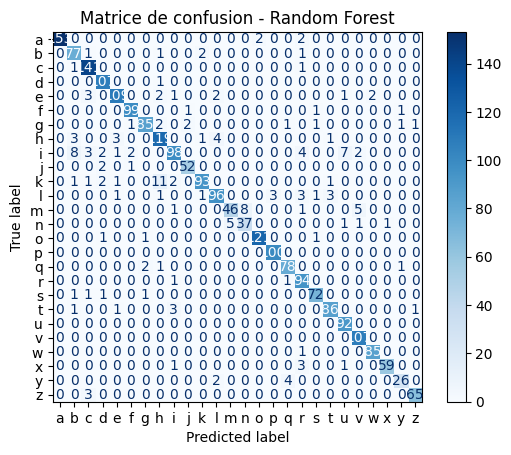

In [47]:
confusion_matrix_construction(name="Random Forest", y_pred=y_pred_rf)

#### KNN

**Classifier definition**

In [36]:
# --------------------------------------------------
# k-NN classifier
# --------------------------------------------------
knn_clf = KNeighborsClassifier(
    n_neighbors=3,        # small value for small dataset
    metric='euclidean',   # standard distance
    weights='distance'    # closer neighbors matter more
)



# Predictions for full classification report
y_pred_knn = cross_val_predict(knn_clf, X_test, y_test, cv=cv)


**Classification report**

In [37]:
cross_validation_report(classifier=knn_clf, y_pred=y_pred_knn)


Cross-validated accuracy scores: [0.97768763 0.97667343 0.98326572 0.98377282 0.97919838]
Mean accuracy: 0.9801195941558275

Classification report (CV):

              precision    recall  f1-score   support

           a       0.97      0.96      0.97       157
           b       0.99      0.94      0.96        82
           c       0.91      1.00      0.95       143
           d       0.99      0.99      0.99       108
           e       0.87      0.97      0.92       120
           f       0.97      0.93      0.95       102
           g       0.96      0.94      0.95        94
           h       0.83      0.89      0.86       131
           i       0.92      0.85      0.89       127
           j       0.94      0.89      0.92        55
           k       0.88      0.75      0.81       112
           l       0.90      0.94      0.92       109
           m       0.77      0.84      0.80        61
           n       0.87      0.60      0.71        45
           o       0.97      0.99 

**Confusion Matrix**

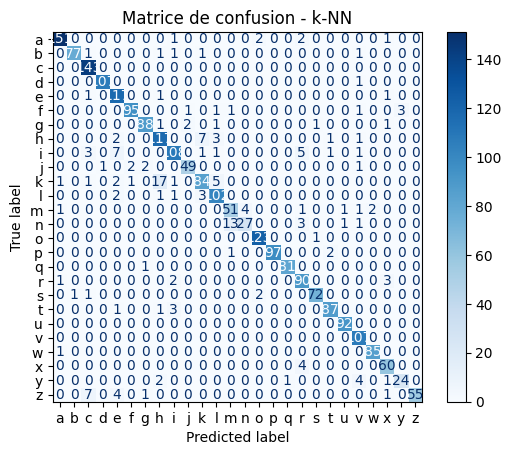

In [48]:
confusion_matrix_construction(name="k-NN", y_pred=y_pred_knn)

#### SVM

**Classifier definition**

In [39]:
# --------------------------------------------------
# SVM classifier
# --------------------------------------------------
svm_clf = SVC(kernel='rbf', C=1.0, gamma='scale')  # paramètres de base



# Prediction for the complete report.
y_pred_svm = cross_val_predict(svm_clf, X_test, y_test, cv=cv)

**Classification report**

In [40]:
cross_validation_report(classifier=svm_clf, y_pred=y_pred_svm)


Cross-validated accuracy scores: [0.98225152 0.98022312 0.98326572 0.98478702 0.98173516]
Mean accuracy: 0.9824525086368983

Classification report (CV):

              precision    recall  f1-score   support

           a       0.99      0.97      0.98       157
           b       0.95      0.96      0.96        82
           c       0.93      0.99      0.96       143
           d       0.98      0.99      0.99       108
           e       0.97      0.97      0.97       120
           f       0.95      0.98      0.97       102
           g       0.92      0.98      0.95        94
           h       0.94      0.95      0.94       131
           i       0.92      0.92      0.92       127
           j       1.00      0.89      0.94        55
           k       0.91      0.90      0.91       112
           l       0.93      0.94      0.94       109
           m       0.75      0.92      0.82        61
           n       0.88      0.49      0.63        45
           o       0.98      0.98 

**Confusion Matrix**

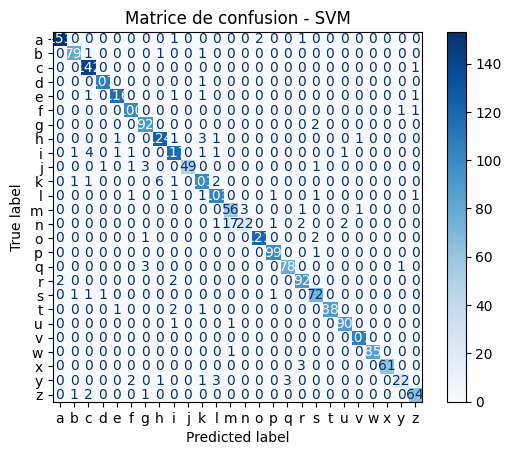

In [49]:
confusion_matrix_construction(name="SVM", y_pred=y_pred_svm)

In [42]:
plt.close()

### Model Choice

Explain which model is the better based on the data, is that explainable ? What it implies about the data ?

Compare the score, acuracy, etc...?

Based on the differents results, here are the conclusion. the best combinaison is : XXXX for feature extraction + YYYY as classifier. We can observe and compare the performances of the differents combination by using the accuray df build in "precise folder path" and the differents confusion matrix stored into "precise folder name where matrix are stored".

## Part IV : Model application

### New data preparation

In [ ]:
from new_data_preparation import prepare_new_data

## The new_data have to follow the same pipeline as the training data
# The file to process is supposed to be in the right folder : data/words/
new_data = prepare_new_data(filename="lancegoat.jpg")

Files from c:\Users\tv68e\Documents\INSA_Lyon\Image_analysis\M1_handwritten_recognition\data\words\characters removed succefully
This word contains 9 characters.
Extraction finished !

Dataframe created !

The df is complete (data + labels) : False
c:\Users\tv68e\Documents\INSA_Lyon\Image_analysis\M1_handwritten_recognition\data\words\characters\char_00.png
c:\Users\tv68e\Documents\INSA_Lyon\Image_analysis\M1_handwritten_recognition\data\words\characters\char_01.png
c:\Users\tv68e\Documents\INSA_Lyon\Image_analysis\M1_handwritten_recognition\data\words\characters\char_02.png
c:\Users\tv68e\Documents\INSA_Lyon\Image_analysis\M1_handwritten_recognition\data\words\characters\char_04.png
c:\Users\tv68e\Documents\INSA_Lyon\Image_analysis\M1_handwritten_recognition\data\words\characters\char_06.png
c:\Users\tv68e\Documents\INSA_Lyon\Image_analysis\M1_handwritten_recognition\data\words\characters\char_07.png
c:\Users\tv68e\Documents\INSA_Lyon\Image_analysis\M1_handwritten_recognition\data\wor

In [ ]:
# Normalisation
X_new = scaler.fit_transform(new_data)

### Application of the choosen model

In [ ]:
predictions = clf.predict(X_new)

### Results

In [ ]:
result = "".join(predictions)
print(result)